In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
from google.colab import files
data_to_load = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(data_to_load['Group9_Cleaned_Dataset.csv']))
dataset.describe()

Saving Group9_Cleaned_Dataset.csv to Group9_Cleaned_Dataset.csv


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_FREQUENCY_bin,ONEOFF_PURCHASES_FREQUENCY_bin,PURCHASES_INSTALLMENTS_FREQUENCY_bin,CASH_ADVANCE_FREQUENCY_bin,CASH_ADVANCE_TRX_bin,PURCHASES_TRX_bin,CREDIT_LIMIT_bin,PAYMENTS_bin,MINIMUM_PAYMENTS_bin,PRC_FULL_PAYMENT_bin
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,...,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,...,4.978433,4.682311,4.605878,4.428651,4.342273,5.291206,5.268969,5.499944,5.499944,3.626550
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,...,2.677094,3.633953,3.357930,3.642091,3.596530,3.059774,2.984193,2.872597,2.872597,3.705279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,1.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,5.000000,7.000000,5.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,1.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,...,8.000000,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<Figure size 432x288 with 0 Axes>

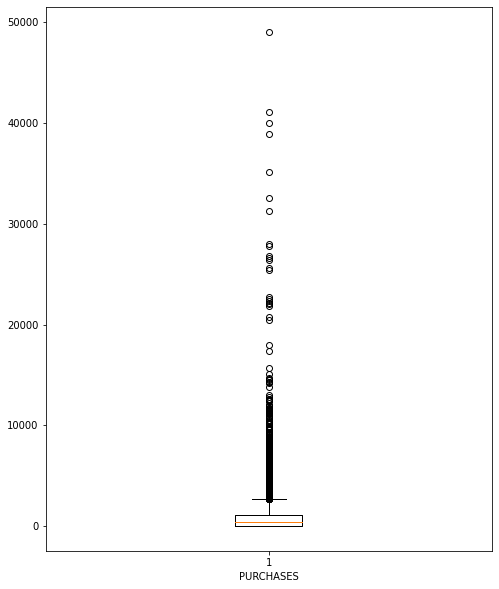

<Figure size 432x288 with 0 Axes>

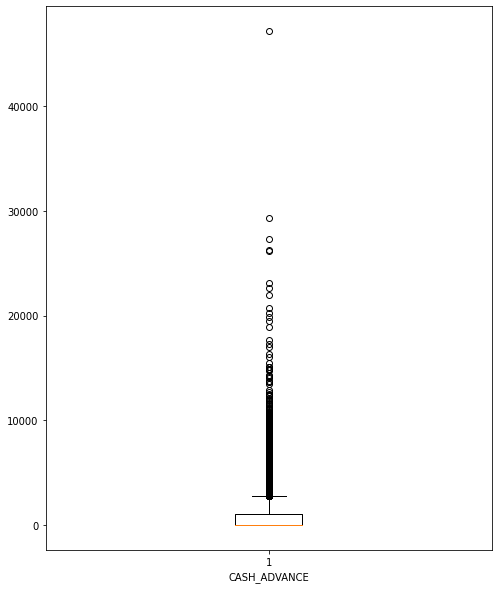

<Figure size 432x288 with 0 Axes>

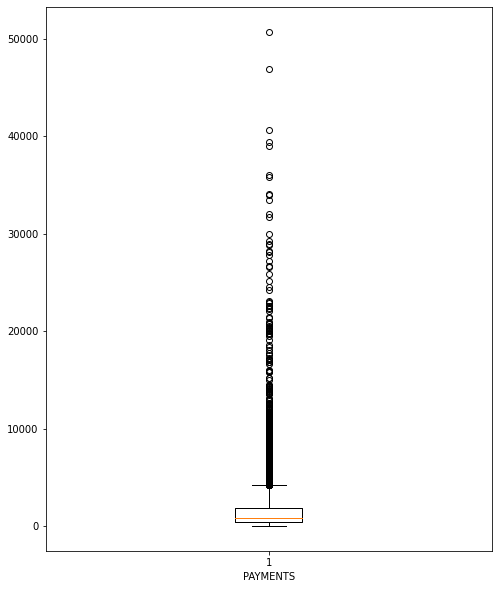

In [4]:
# Create Boxplots to identify outliers
columns = ['PURCHASES','CASH_ADVANCE', 'PAYMENTS']
for col in columns:
    plt.figure()
    plt.figure(figsize=(8,10))
    plt.boxplot(dataset[col])
    plt.xlabel(col)

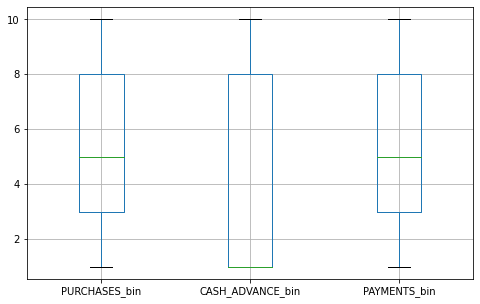

In [5]:
# Mitigate outliers through binning
dataset.boxplot(column=['PURCHASES_bin','CASH_ADVANCE_bin', 'PAYMENTS_bin'], figsize=(8,5))

In [6]:
data_model = dataset.copy().drop(["CUST_ID"], axis=1)

Text(0.5, 1.0, 'Elbow Curve')

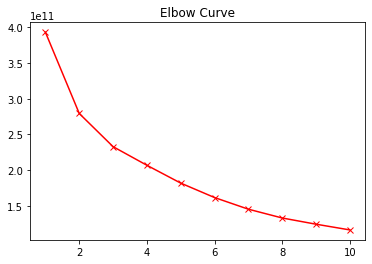

In [7]:
random.seed(0)
n_clusters=10
sse=[]
for i in range(1,n_clusters+1):
    kmean= KMeans(i)
    kmean.fit(data_model)
    sse.append([i, kmean.inertia_])
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], 'rx-')
plt.title("Elbow Curve")

In [8]:
binlist = ["BALANCE_bin",
"BALANCE_FREQUENCY_bin",
"PURCHASES_bin",
"ONEOFF_PURCHASES_bin",
"INSTALLMENTS_PURCHASES_bin",
"CASH_ADVANCE_bin",
"PURCHASES_FREQUENCY_bin",
"ONEOFF_PURCHASES_FREQUENCY_bin",
"PURCHASES_INSTALLMENTS_FREQUENCY_bin",
"CASH_ADVANCE_FREQUENCY_bin",
"CASH_ADVANCE_TRX_bin",
"PURCHASES_TRX_bin",
"CREDIT_LIMIT_bin",
"PAYMENTS_bin",
"MINIMUM_PAYMENTS_bin",
"PRC_FULL_PAYMENT_bin",
"TENURE"]

In [9]:
#Method 1 - KMeans → PCA

num_clusters = 5
randomseed = 0

data_model_ = data_model.copy()
data_model_ = data_model_.loc[:, binlist]

kmean = KMeans(n_clusters=num_clusters, random_state=randomseed)
kmean.fit(data_model_)
y_kmeans = kmean.predict(data_model_)
data_model_['Cluster'] = y_kmeans

Text(0, 0.5, 'Cumulative Variance Explained')

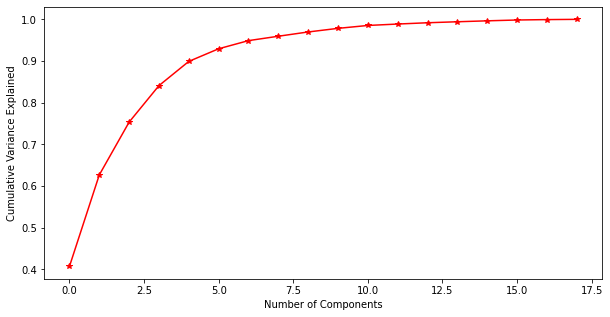

In [10]:
pca = PCA()
pca.fit(data_model_)
fig = plt.figure(figsize =(10,5))
plt.plot(pca.explained_variance_ratio_.cumsum(), "r*-")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")

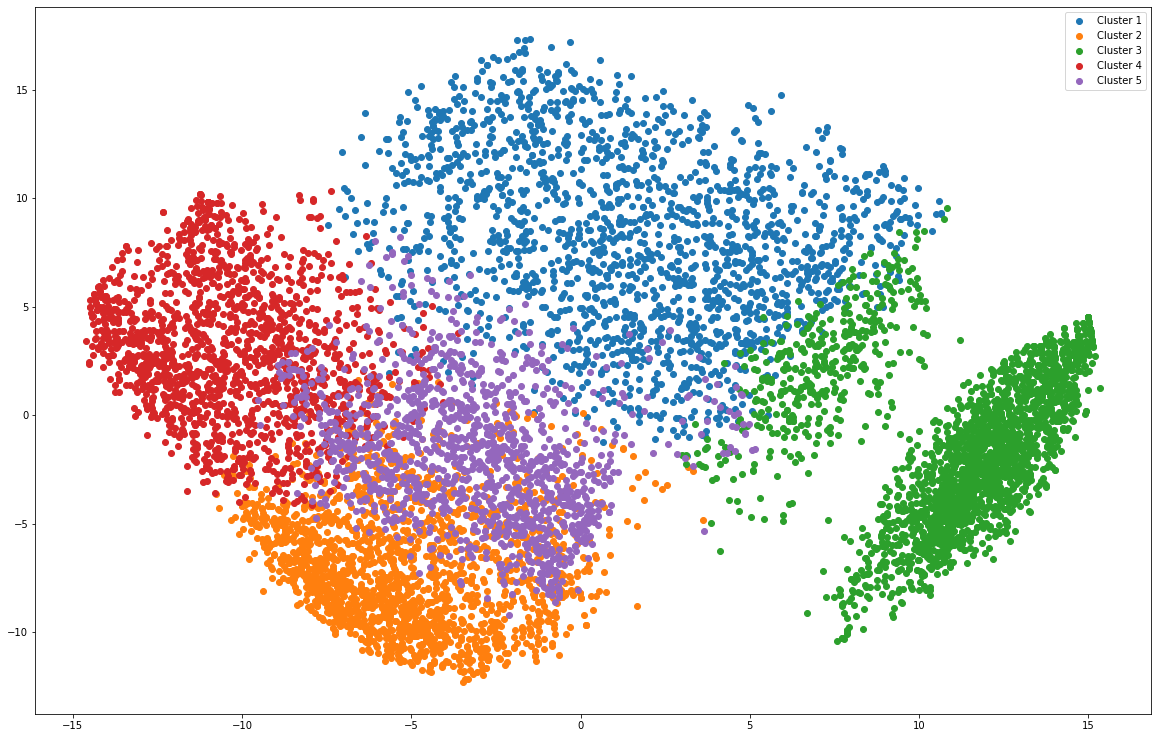

0.3095737311617297
0.6266774318494193


In [11]:
pca = PCA(n_components = 2)
pca.fit(data_model_)

scores = pca.transform(data_model_)

x, y = scores[:,0], scores[:,1]
df_data = pd.DataFrame({'x': x, 'y':y, 'clusters':y_kmeans})
grouping_ = df_data.groupby('clusters')
fig, ax = plt.subplots(figsize=(20, 13))

names = {0: 'Cluster 1', 
         1: 'Cluster 2', 
         2: 'Cluster 3',
         3: 'Cluster 4',
         4: 'Cluster 5'}

for name, grp in grouping_:
    ax.plot(grp.x, grp.y, marker='o', label = names[name], linestyle='')
    ax.set_aspect('auto')

ax.legend()
plt.show()

silhouettescore = silhouette_score(data_model_.drop(["Cluster"], axis=1), data_model_["Cluster"])
print(silhouettescore)

print(sum(pca.explained_variance_ratio_))

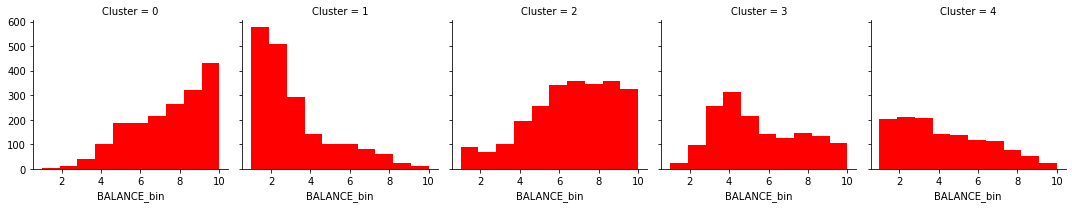

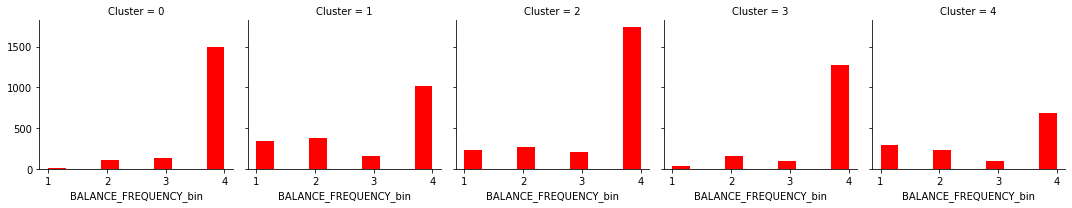

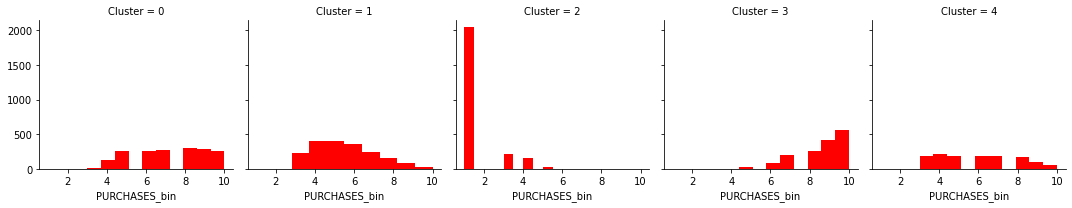

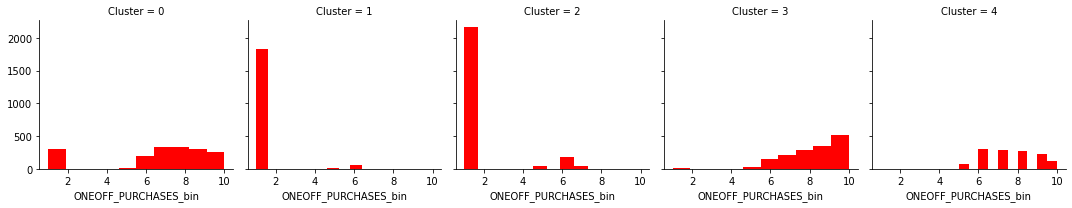

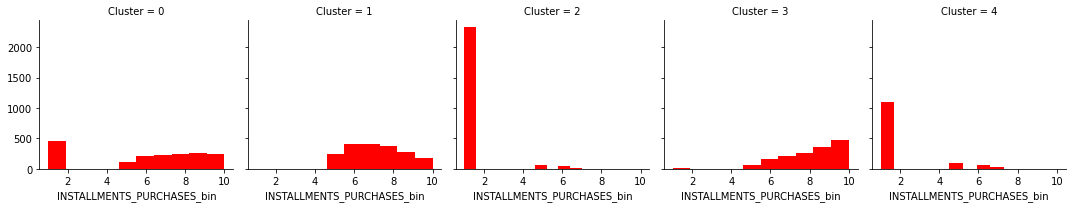

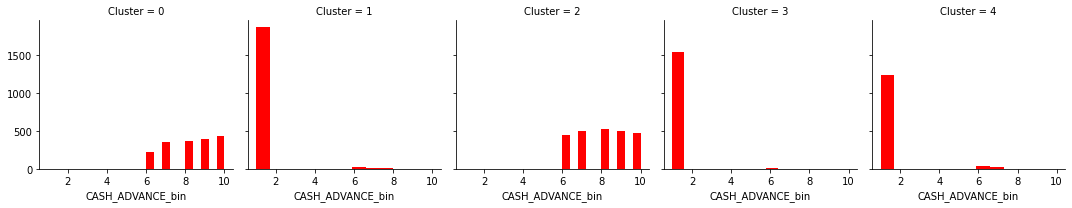

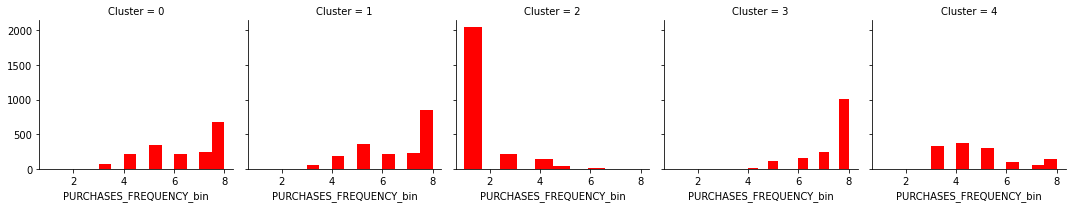

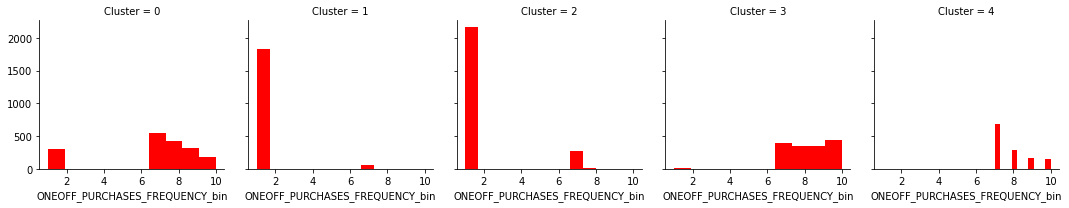

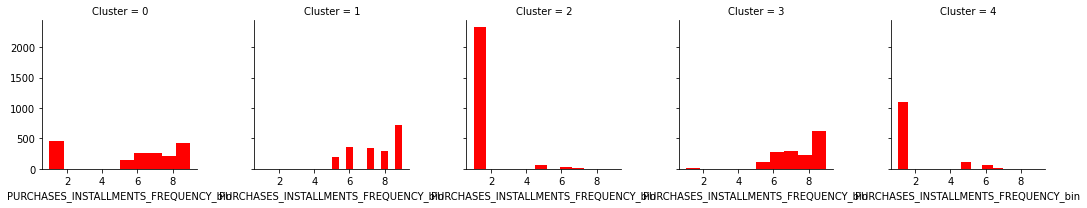

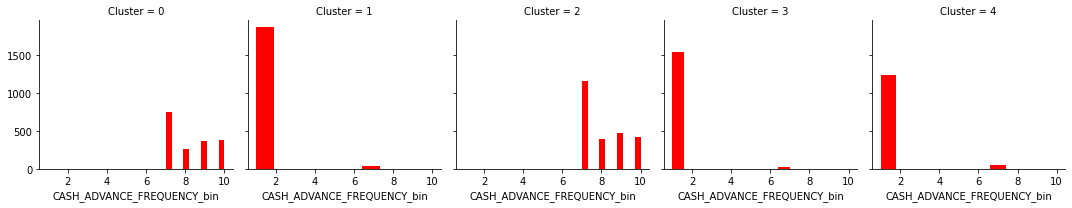

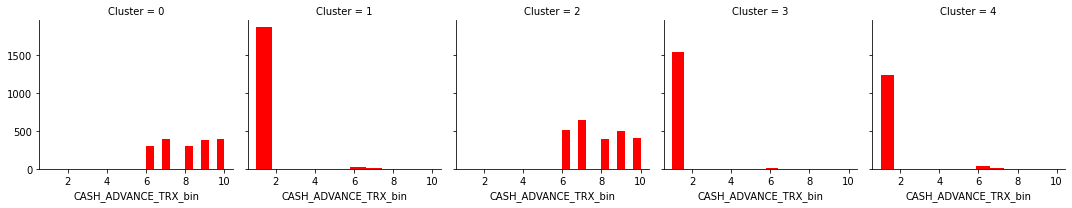

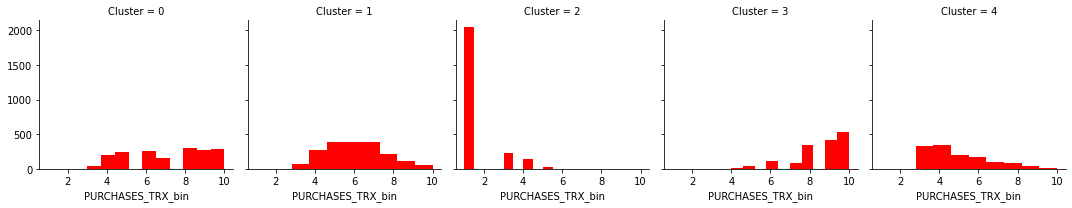

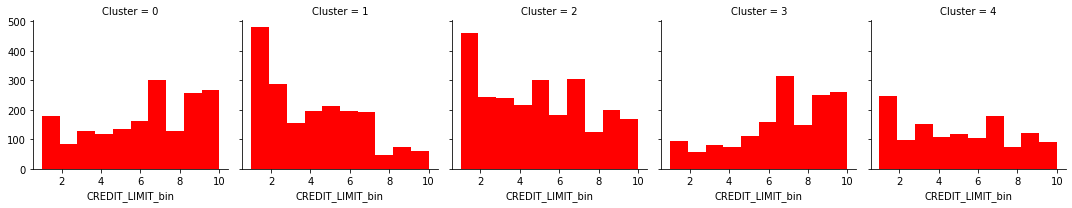

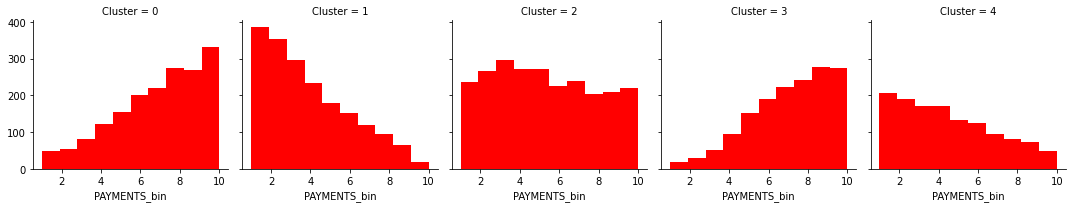

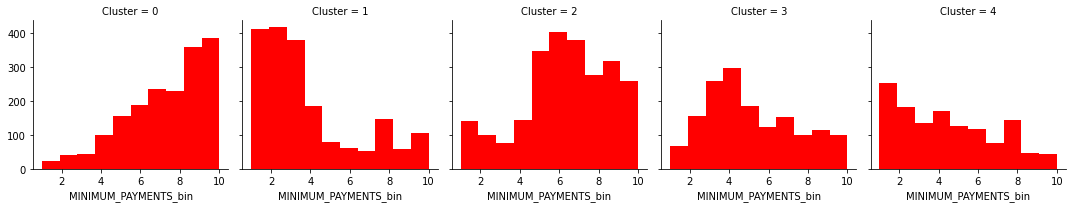

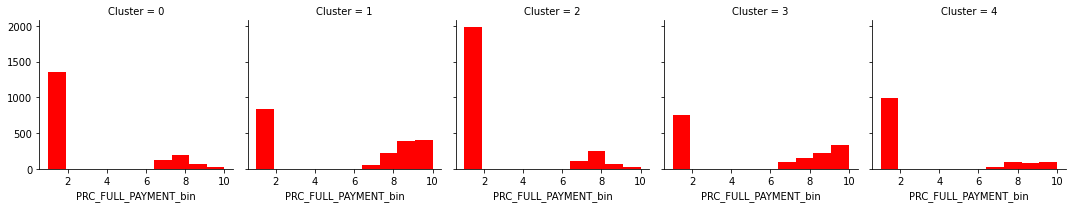

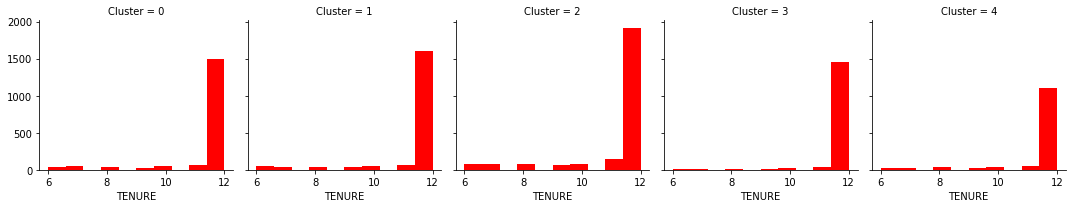

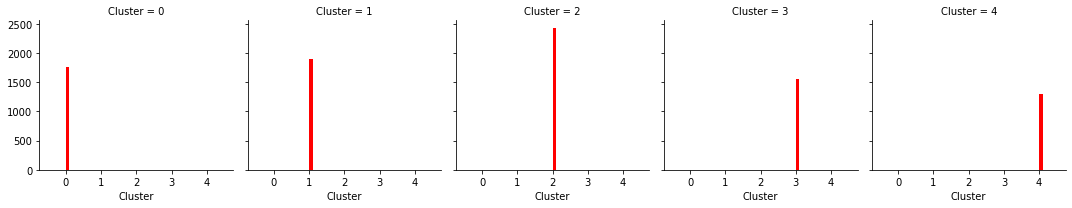

In [12]:
for c in data_model_:
    g   = sns.FacetGrid(data_model_, col='Cluster')
    g.map(plt.hist, c, color = "red")

In [ ]:
#Method 2 - PCA → KMeans

In [13]:
num_clusters = 5
randomseed = 0

data_model_ = data_model.copy()

In [14]:
data_model_ = data_model_.loc[:, binlist]

In [15]:
pca = PCA(n_components = 2)
pca.fit(data_model_)

scores = pca.transform(data_model_)

print(sum(pca.explained_variance_ratio_))

0.6323430109810793


In [16]:
scores.shape

(8949, 2)

In [26]:
data_model_pca = scores

In [28]:
kmean = KMeans(n_clusters=num_clusters, random_state=randomseed)
kmean.fit(data_model_pca)
y_kmeans = kmean.predict(data_model_pca)
data_model_['Cluster'] = y_kmeans
data_model_pca = pd.DataFrame(data_model_pca)
data_model_pca['Cluster'] = y_kmeans

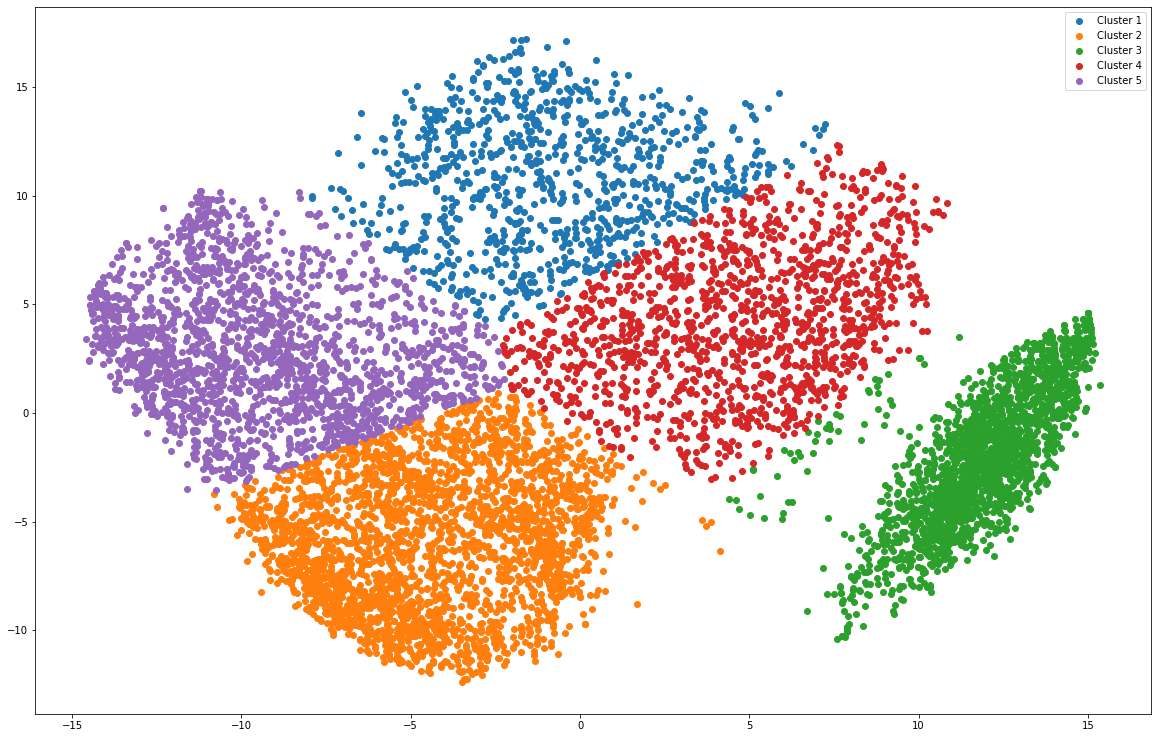

0.4733219924201511
0.6323430109810793


In [30]:
x, y = scores[:,0], scores[:,1]
df_data = pd.DataFrame({'x': x, 'y':y, 'clusters':y_kmeans})
grouping_ = df_data.groupby('clusters')
fig, ax = plt.subplots(figsize=(20, 13))

names = {0: 'Cluster 1', 
         1: 'Cluster 2', 
         2: 'Cluster 3',
         3: 'Cluster 4',
         4: 'Cluster 5'}

for name, grp in grouping_:
    ax.plot(grp.x, grp.y, marker='o', label = names[name], linestyle='')
    ax.set_aspect('auto')

ax.legend()
plt.show()

silhouettescore = silhouette_score(data_model_pca.drop(["Cluster"], axis=1), data_model_pca["Cluster"])
print(silhouettescore)

print(sum(pca.explained_variance_ratio_))

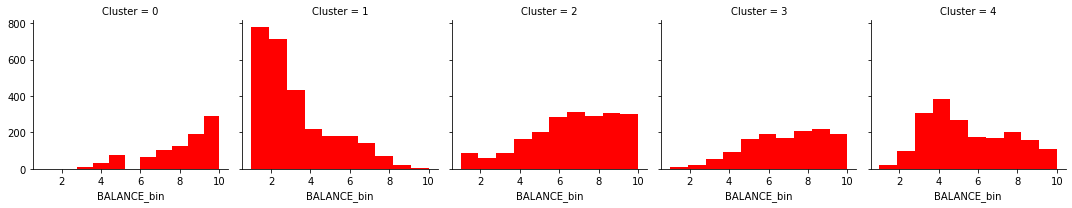

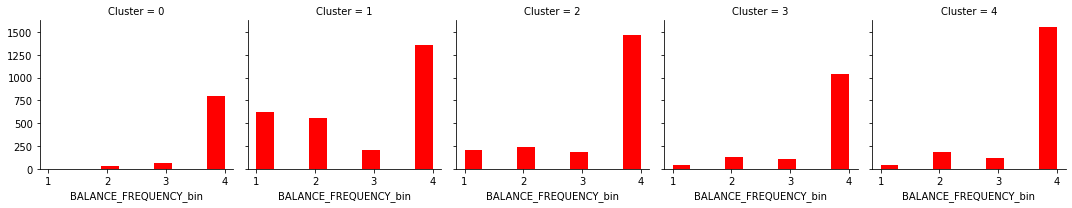

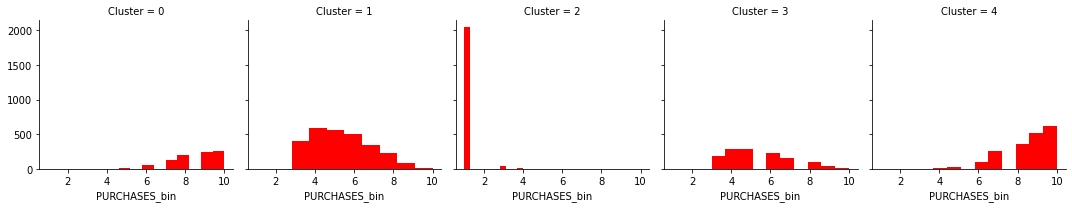

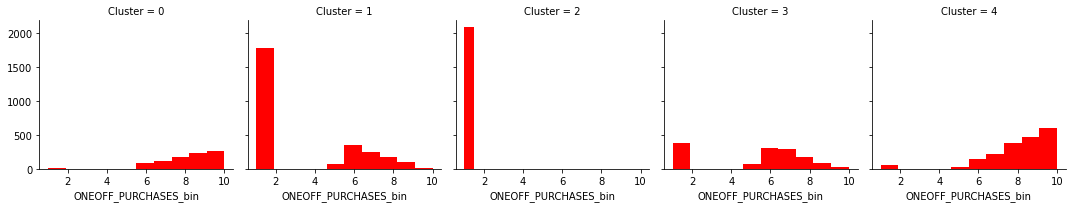

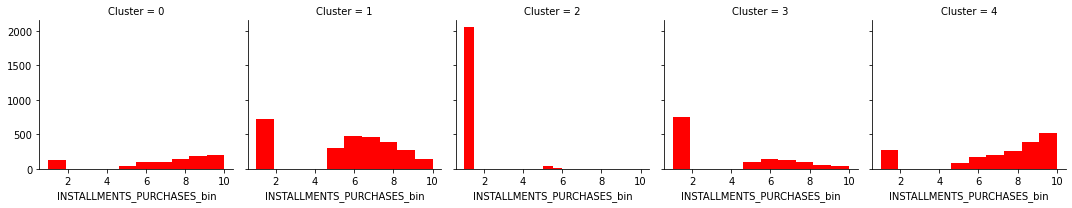

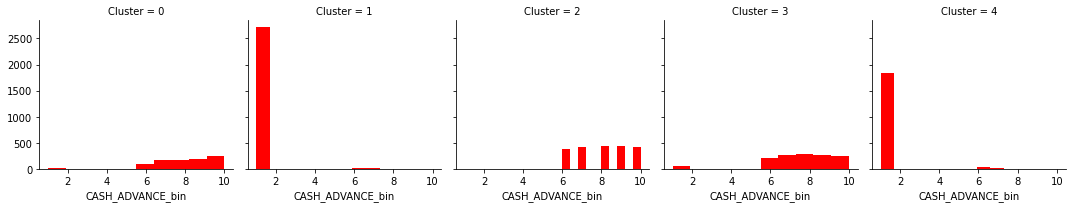

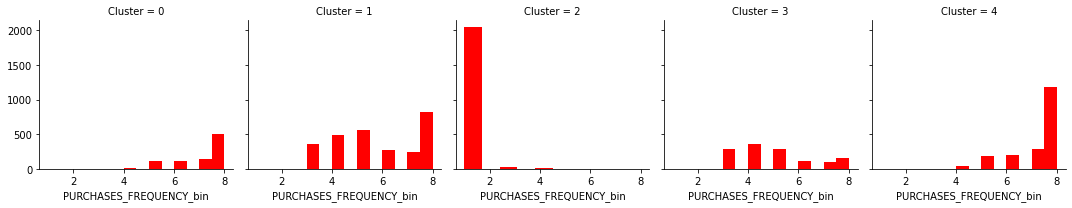

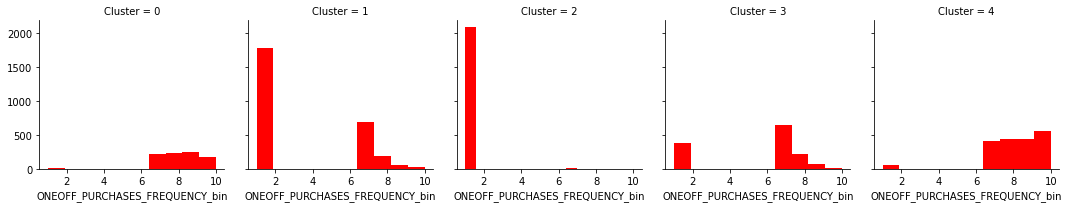

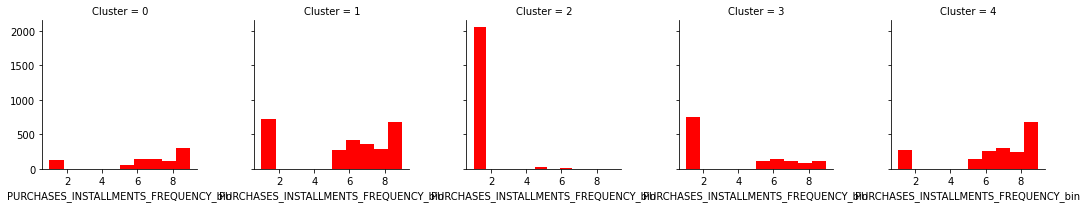

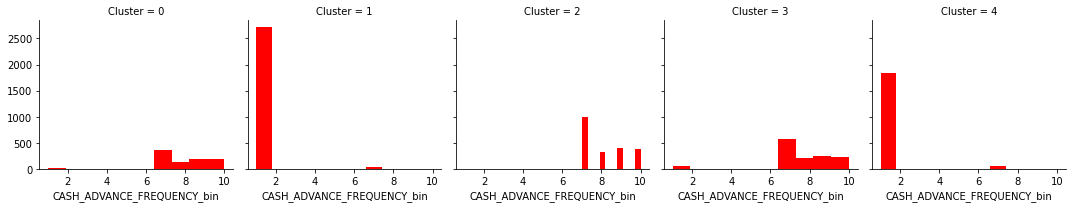

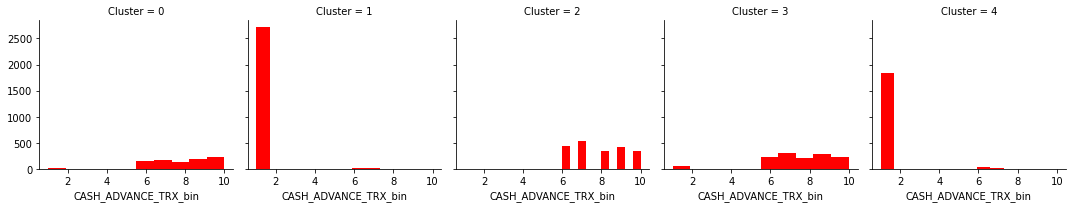

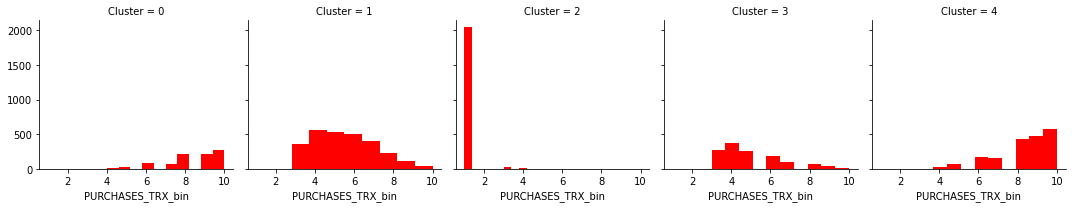

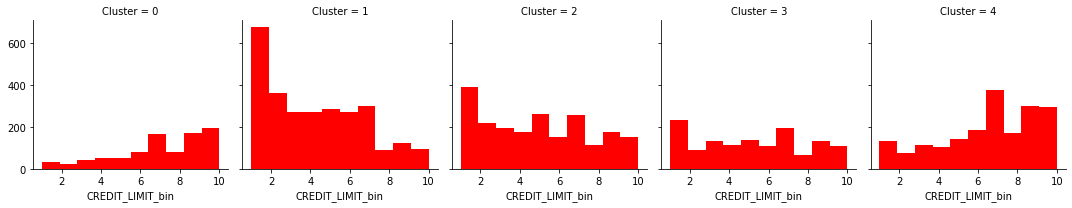

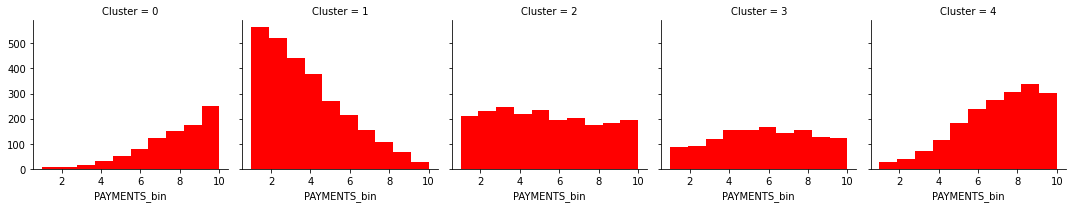

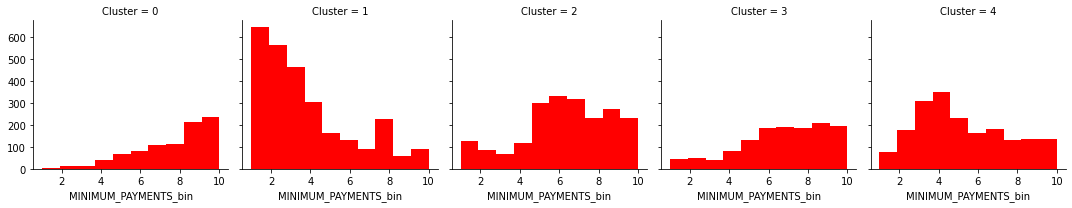

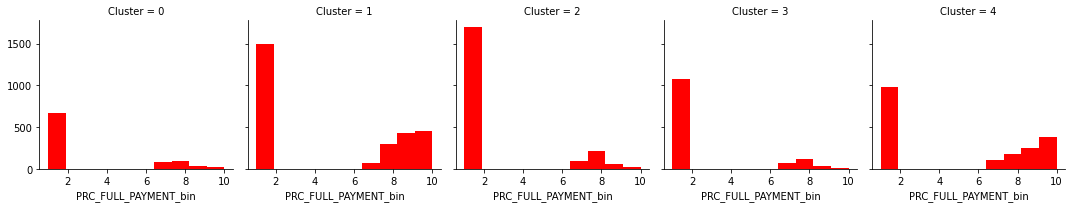

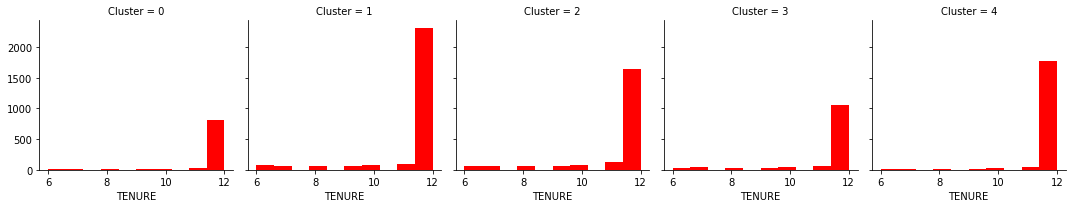

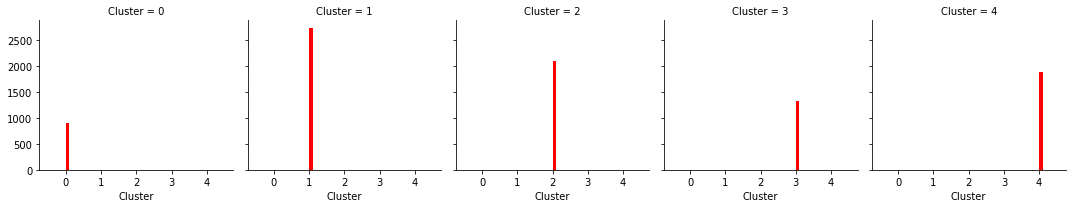

In [31]:
for c in data_model_:
    g = sns.FacetGrid(data_model_, col='Cluster')
    g.map(plt.hist, c, color = "red")